<a href="https://colab.research.google.com/github/techmoritzdee/HWR_Berlin/blob/main/knowledge_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [2]:
## General
import pandas as pd
import numpy as np
import bs4
import requests

## Text Seperation
import re
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
import pickle

from spacy.matcher import Matcher 
from spacy.tokens import Span 

## Visualization
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline
pd.set_option('display.max_columns', None)

In [5]:
from pyvis.network import Network
import IPython

In [4]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=e0d590f3a5f834fd6e7125aed507ddc417f2121a31fe25be1f84e2e26d06b010
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Functions & Classes

## Knowledge Graph

### Classes

In [9]:
class KB():
    def __init__(self):
        self.entities = {}
        self.relations = []
        #self.path = r"/content/drive/MyDrive/twsm/isontology.csv"
        #self.df = pd.read_csv(self.path, index_col=0)
        self.ent_heads = []
        self.ent_tails = []

    def are_relations_equal(self, r1, r2):
        return all(r1[attr] == r2[attr] for attr in ["head", "tail"])

    def exists_relation(self, r1):
        return any(self.are_relations_equal(r1, r2) for r2 in self.relations)

    def add_relation(self, r):
        

        if not self.exists_relation(r):
            self.relations.append(r)
        
        candidate_entities = [r["head"], r["tail"]]

        # manage new entities
        for ent in candidate_entities:
            self.add_entity_relation(ent)
    

    def add_entity_relation(self, e):
        self.entities[e] = e
      
    def add_entity(self, e):
        ent = self.entity_linking(e)
        self.entities[ent] = ent


    def print(self):
        print("Relations:")
        for r in self.relations:
          print(f"  {r}")

### Function

In [10]:
def get_relations(ent_id, lv1, lv2, lv3, lv4, lv5, lv6, lv7, lv8, lv9, lv10):
  list_lv = [lv1, lv2, lv3, lv4, lv5, lv6, lv7, lv8, lv9, lv10]
  if ent_id not in list_lv:
    return None
  elif not ent_id == lv1:  
    ent2 = list_lv[list_lv.index(ent_id) -1]
    x = {"head":ent2, "type":"rel", "tail":ent_id}
    kb.add_relation(x)
    return None
  else:
    x = {"head":ent_id, "type":"rel", "tail":ent_id}
    kb.add_relation(x)
    return None

In [90]:
def save_network_html(kb, filename="network.html"):
    # create network
    net = Network(directed=True, width="700px", height="700px", bgcolor="#eeeeee")

    # nodes
    color_entity = "#FF0000"
    for e in kb.entities:
        net.add_node(e, shape="circle", color=color_entity)

    # edges
    for r in kb.relations:
        net.add_edge(r["head"], r["tail"],
                    title=r["type"], label=r["type"])
        
    # save network
    net.repulsion(
        node_distance=200,
        central_gravity=0.2,
        spring_length=200,
        spring_strength=0.05,
        damping=0.09
    )
    net.set_edge_smooth('dynamic')
    net.show(filename)

    return net

## Exploration

### Graphics

In [12]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

### Plotting

In [13]:
def big_plotter(dataframe, column):
  fig, ax1 = plt.subplots(figsize=(20,3))
  graph = sns.countplot(ax=ax1,x=column, data=dataframe)
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  i=0
  for p in graph.patches:
      height = p.get_height()
      graph.text(p.get_x()+p.get_width()/2., height + 0.1,
          column.value_counts()[i],ha="center")
      i += 1

# Data Imports

In [14]:
papers = pd.read_csv("/content/drive/MyDrive/TWSM_Visual/papers.csv")
entities = pd.read_csv("/content/drive/MyDrive/TWSM_Visual/entities.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
papers_new = papers[['article_id','journal_akronym']]

In [16]:
sentences_path = r'/content/drive/MyDrive/2022_Analytics Lab Student Projects/Data/All Topics/Fulltext of Corpus/sentences.csv'

In [17]:
dt = pd.read_csv(sentences_path)

In [18]:
#dt.head(2)

In [19]:
real_dt = dt.merge(entities, how='inner', on='sentence_id')

In [20]:
ent_train = entities.head(100000)

In [21]:
json_ont = pd.read_json('/content/drive/MyDrive/2022_Analytics Lab Student Projects/Data/All Topics/Ontology/isontology.json')

In [22]:
json_ont.iloc[0]

root    {'IS topic': [{'IS sourcing': [{'outsourcing': ['offshoring', 'onshoring', 'nearshoring', {'business process outsourcing': ['knowledge process outsourcing', 'legal process outsourcing']}]}, 'insou...
Name: 0, dtype: object

In [23]:
with open('/content/drive/MyDrive/TWSM_Visual/ent_new.pickle', 'rb') as handle:
    ent_new = pickle.load(handle)

In [24]:
 with open('/content/drive/MyDrive/TWSM_Visual/df_final.pickle', 'rb') as handle:
    df_final = pickle.load(handle)

In [25]:
citings = pd.read_csv('/content/drive/MyDrive/TWSM_Visual/citations.csv')

In [26]:
ent_art = entities[["article_id","para_id","sentence_id","label","ent_id"]]

In [27]:
ent_final = pd.concat([ent_art,ent_new],axis=1)
ent_final = pd.merge(ent_final,papers_new,how='left',on='article_id')

In [28]:
ontology = pd.read_csv("/content/drive/MyDrive/TWSM_Visual/isontology.txt",sep='\t')
ontology["entity"] = ontology.entity.apply(lambda x: str(x).replace('├──',''))
ontology["entity"] = ontology.entity.apply(lambda x: str(x).replace('│',''))
ontology["entity"] = ontology.entity.apply(lambda x: str(x).replace('└── ',''))
ontology["entity"] = ontology.entity.apply(lambda x: str(x).strip())

In [29]:
ont = ontology["entity"].tolist()

In [30]:
matrix = pd.read_parquet('/content/drive/MyDrive/TWSM_Visual/matrix_count.parquet')

# Knowledge Graph

In [31]:
kb = KB()

In [32]:
dic = {"a": [1,2,3,4,5], "b":[1,2,3,4,5]}

df_test = pd.DataFrame(dic)

In [33]:
df_test["neu"] = df_test.apply(lambda x: x["a"] + x["b"], axis = 1)

In [34]:
ent_train["test123"] = ent_train.apply(lambda x: get_relations(x["ent_id"], x["level_1"], x["level_2"], x["level_3"], x["level_4"], x["level_5"], x["level_6"], x["level_7"], x["level_8"], x["level_9"], x["level_10"]), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
kb.entities

{'knowledge management': 'knowledge management',
 'knowledge repository': 'knowledge repository',
 'digital business': 'digital business',
 'digital platform': 'digital platform',
 'ERP software package': 'ERP software package',
 'Salesforce.com': 'Salesforce.com',
 'human centered design': 'human centered design',
 'participatory design': 'participatory design',
 'participant': 'participant',
 'group participant': 'group participant',
 'social media': 'social media',
 'blog': 'blog',
 'online community': 'online community',
 'social media site': 'social media site',
 'Reddit': 'Reddit',
 'model link': 'model link',
 'research hypothesis': 'research hypothesis',
 'economic theory': 'economic theory',
 'social exchange theory': 'social exchange theory',
 'individual participant': 'individual participant',
 'conceptual method': 'conceptual method',
 'literature study': 'literature study',
 'software license': 'software license',
 'open source': 'open source',
 'conceptual modelling': 'co

In [91]:
filename = "network_test.html"
net = save_network_html(kb, filename=filename)
IPython.display.HTML(filename=filename)

# Exploration

### Histplots

In [37]:
level_count = []
y = [u'Level_1', u'Level_2', u'Level_3', u'Level_4', u'Level_5', u'Level_6', u'Level_7', u'Level_8', u'Level_9', u'Level_10']

for x in ent_new:
  x = ent_new[x].nunique()
  level_count.append(x)

In [38]:
level_count = level_count[:10]

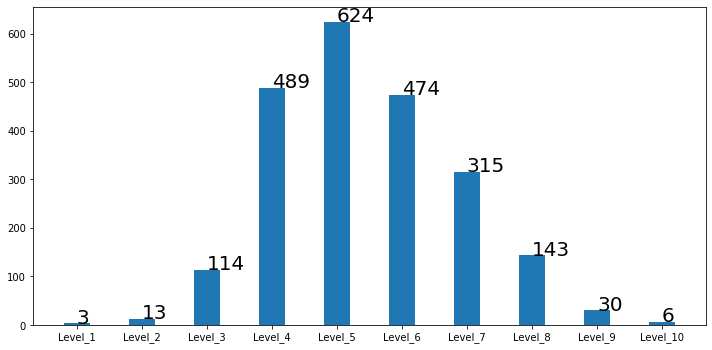

In [39]:
#How many unique ontologies are represented for each ontology level?
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(y,level_count,width=0.4)

for index,data in enumerate(level_count):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

In [40]:
ent_new['level_1'].value_counts()

domain specific entity    1088329
methodological entity      427000
theoretical entity         282411
Name: level_1, dtype: int64

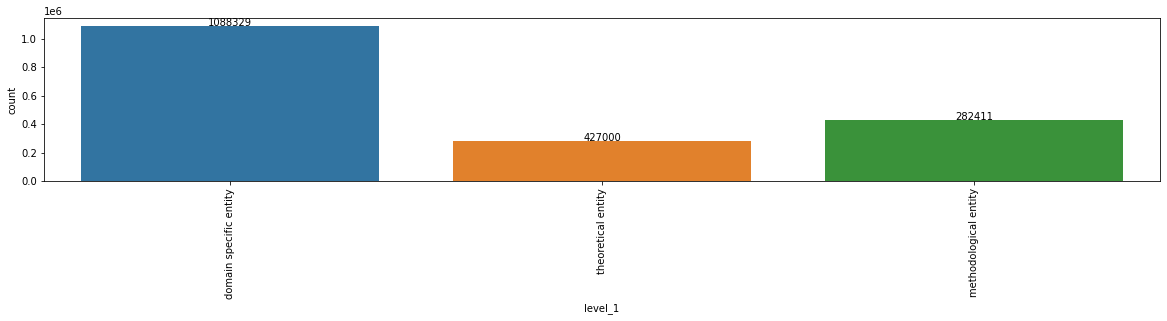

In [41]:
big_plotter(ent_new, ent_new['level_1'])

In [42]:
ent_new['level_2'].value_counts()

IS technology           463211
IS topic                461262
research method         257820
model                   196827
economic sector         102057
statistical metric       78673
data analysis method     73002
study object             61799
theory                   60091
research paradigm        13429
level of analysis        12064
validity                 11357
sampling                  6148
Name: level_2, dtype: int64

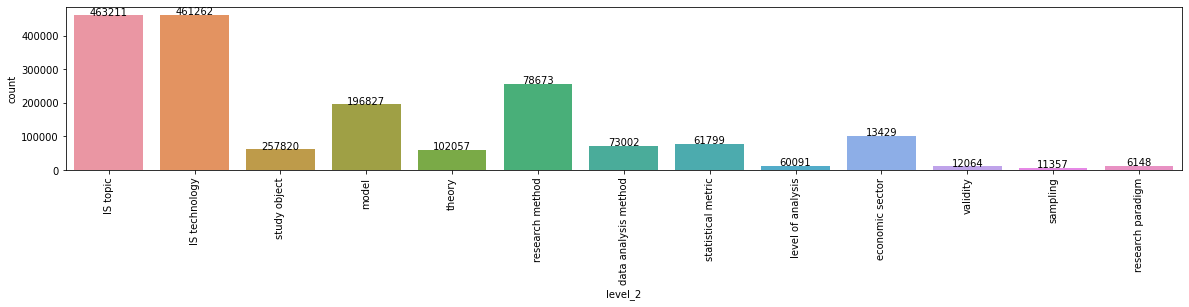

In [43]:
big_plotter(ent_new, ent_new['level_2'])

In [44]:
ent_new['level_3'].value_counts().head(30)

data collection method                   183914
model element                            154082
information technology infrastructure    123673
IS evaluation                            115117
enterprise information system             92651
conceptual method                         73906
quantitative analysis                     59648
digital media                             56110
IT security                               54552
participant                               51625
systems development                       51181
IT workforce                              39817
electronic business                       38219
societal context                          37919
IS sourcing                               34428
information systems strategy              30188
mobile system                             27041
framework                                 25946
knowledge management                      24979
quantitative confidence value             24302
digital economy                         

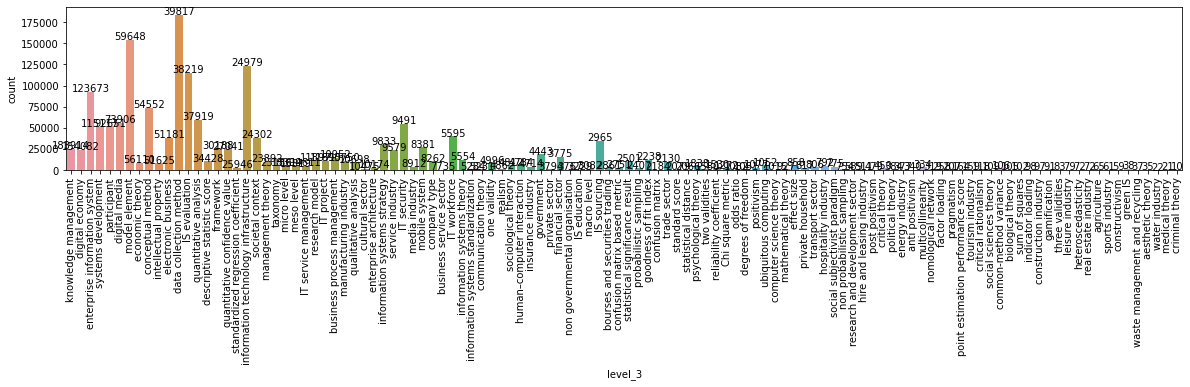

In [45]:
big_plotter(ent_new, ent_new['level_3'])

In [46]:
ent_new['level_4'].value_counts().head(30)

evaluation criteria                     114108
model link                               67695
empirical quantitative method            66805
empirical qualitative method             66270
communication service infrastructure     64744
social media                             48002
construct                                45879
organizational context                   29764
variable                                 27557
individual participant                   25631
privacy                                  25532
outsourcing                              25072
operational information system           24336
design science                           23892
analytical information system            23542
p-value                                  23301
digital business                         21383
research stage                           21023
electronic commerce                      20720
industry specific information system     19964
conceptual modelling                     19342
healthcare in

In [47]:
ent_new['level_5'].value_counts().head(30)

IS evaluation criteria               104182
research hypothesis                   65270
internet technology                   42675
survey                                37390
qualitative interview                 30097
experiment                            23052
future research                       17439
social media site                     17401
case study                            15093
enterprise resource planning          13400
design artifact                       12963
IT supported collaboration            12798
electronic mail                       12371
IT manager                            11306
digital platform                      11225
health information system             10665
dependent variable                    10659
types of work                         10141
artificial intelligence                9765
business evaluation criteria           9473
technical IT security defense          7960
social network                         7940
machine learning method         

In [48]:
ent_new['level_6'].value_counts().head(30)

user evaluation criteria             52941
numbered hypothesis                  46195
productivity                         24092
world wide web                       23351
IS impact                            18290
remote work                           7708
survey design                         7703
ICT industry                          6901
group support system                  6438
ethnography                           6174
Chief Information Officer             5569
business model                        5531
participatory design                  5455
Facebook                              5401
information technology capability     5299
Twitter                               5272
experimental design                   5202
access control                        5009
network effect                        4687
open source                           4461
structural equation modeling          4005
data quality                          4005
factor analysis                       3965
healthcare 

In [49]:
print(ent_new['level_7'].value_counts().sum())
ent_new['level_7'].value_counts().head(30)

181694


information system use            38308
website                           22747
organizational impact              9658
organizational productivity        8592
ease of use                        7407
item scale                         4717
virtual teamwork                   4614
telecommunications industry        4113
electronic authentication          4046
classification method              3761
information systems usefulness     3662
field study                        3347
experimental group                 3288
technostress                       2985
cluster analysis                   2892
task productivity                  2681
IS success                         2494
software industry                  2090
IS value                           2023
knowledge base                     1832
focus group                        1697
Wikipedia                          1631
team productivity                  1562
ride sharing platform              1331
SEM tool                           1268


In [50]:
ent_new['level_8'].value_counts().head(30)

technology adoption                         11031
competitive advantage                        5498
perceived usefulness                         3600
organizational value                         3287
usage intention                              3259
usability                                    2581
web page                                     2517
Likert scale                                 2337
password                                     2296
perceived ease of use                        2174
financial performance                        1063
artificial neural network                    1011
decision tree classification                 1006
ridesharing company                           976
NLP application                               960
information overload                          906
support vector machine                        863
mobile payment                                765
IS failure                                    736
DVD                                           640


In [51]:
ent_new['level_9'].value_counts().head(30)

user acceptance                          4167
Uber                                      905
user resistance                           791
sentiment analysis                        524
smart card                                407
functional magnetic resonance imaging     321
hypertext                                 242
chatbot                                   222
bagging method                            173
boosting method                           113
k-means clustering                        100
event log                                  95
information extraction                     82
Lyft                                       69
question answering                         53
machine translation                        26
part of speech tagging                     23
agglomerative hierarchical clustering      20
social media addiction                     10
named entity recognition                    9
one-time password                           7
document generation               

In [52]:
ent_new['level_10'].value_counts().head(30)

user satisfaction                  3243
random forest classification        165
gradient boosting                    96
SIM card                             50
aspect-based sentiment analysis      27
AdaBoost                             16
Name: level_10, dtype: int64

## Check Data Quality & Metrics

In [53]:
# How many strings are concatinated?
len(df_final['group'].iloc[1])

5886

# Citation Plot

In [54]:
part_cite = citings.head(1000)

In [55]:
part_cite.head(1)

,article_id,sentence_id,para_id,section_nr,section_title,subsection_title,reference_citekey,journal_latest,paper_citekey
0,1,1_322_354,1_3,1,Introduction,NaN,nambisan_s_designing_virtual_customer_environments_for_new_product_development_toward_a_theory_acad_2002_management_review,management review,(kevin)_yan_j_examining_interdependence_between_product_users_and_employees_in_online_user_communities_the_role_of_employee_generated_content_2021_the_journal_of_strategic_information_systems


In [56]:
count_cite = part_cite.groupby("article_id", dropna=True).sum()

In [57]:
count_cite = count_cite.reset_index()

In [58]:
count_cite.head(1)

,article_id,section_nr
0,1,957


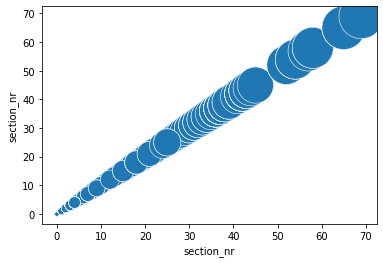

In [59]:
# use the scatterplot function to build the bubble map
sns.scatterplot(data=part_cite, x="section_nr", y="section_nr", size="section_nr", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

### Chart Function

In [60]:
#!pip install d3graph

In [61]:
ent_final.head(2)

,article_id,para_id,sentence_id,label,ent_id,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,group,journal_akronym
0,1,1_3,1_322_354,TOPIC,knowledge repository,domain specific entity,IS topic,knowledge management,knowledge repository,NaN,NaN,NaN,NaN,NaN,NaN,"domain specific entity, IS topic, knowledge management, knowledge repository",JSIS
1,1,1_3,1_467_502,TOPIC,digital platform,domain specific entity,IS topic,digital economy,digital business,digital platform,NaN,NaN,NaN,NaN,NaN,"domain specific entity, IS topic, digital economy, digital business, digital platform",JSIS


In [62]:
ent_final.iloc[:,[0,4,5,6,7,8,9,10,11,12,13,14]]

,article_id,ent_id,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10
0,1,knowledge repository,domain specific entity,IS topic,knowledge management,knowledge repository,NaN,NaN,NaN,NaN,NaN,NaN
1,1,digital platform,domain specific entity,IS topic,digital economy,digital business,digital platform,NaN,NaN,NaN,NaN,NaN
2,1,Salesforce.com,domain specific entity,IS technology,enterprise information system,operational information system,enterprise resource planning,ERP software package,Salesforce.com,NaN,NaN,NaN
3,1,participatory design,domain specific entity,IS topic,systems development,system development method,human centered design,participatory design,NaN,NaN,NaN,NaN
4,1,group participant,domain specific entity,study object,participant,group participant,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1797735,6831,literature sample,methodological entity,research method,conceptual method,literature study,structured literature research,literature sample,NaN,NaN,NaN,NaN
1797736,6831,internet technology,domain specific entity,IS technology,information technology infrastructure,communication service infrastructure,internet technology,NaN,NaN,NaN,NaN,NaN
1797737,6831,government,domain specific entity,economic sector,government,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1797738,6831,health information system,domain specific entity,IS technology,enterprise information system,industry specific information system,health information system,NaN,NaN,NaN,NaN,NaN


In [63]:
dt = pd.read_json(r'/content/drive/MyDrive/TWSM_Visual/isontology.json')

## Network Graph

In [64]:
ent_new['level_1'].unique()

array(['domain specific entity', 'theoretical entity',
       'methodological entity'], dtype=object)

In [65]:
ent_new.head()

,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,group
0,domain specific entity,IS topic,knowledge management,knowledge repository,NaN,NaN,NaN,NaN,NaN,NaN,"domain specific entity, IS topic, knowledge management, knowledge repository"
1,domain specific entity,IS topic,digital economy,digital business,digital platform,NaN,NaN,NaN,NaN,NaN,"domain specific entity, IS topic, digital economy, digital business, digital platform"
2,domain specific entity,IS technology,enterprise information system,operational information system,enterprise resource planning,ERP software package,Salesforce.com,NaN,NaN,NaN,"domain specific entity, IS technology, enterprise information system, operational information system, enterprise resource planning, ERP software package, Salesforce.com"
3,domain specific entity,IS topic,systems development,system development method,human centered design,participatory design,NaN,NaN,NaN,NaN,"domain specific entity, IS topic, systems development, system development method, human centered design, participatory design"
4,domain specific entity,study object,participant,group participant,NaN,NaN,NaN,NaN,NaN,NaN,"domain specific entity, study object, participant, group participant"


In [66]:
import plotly.graph_objects as go

import networkx as nx
G = nx.Graph()

F = [G.add_node(ent) for ent in ent_new['level_1'].unique()]

In [67]:
entity = ent_final.head(1)

In [68]:
G.nodes

NodeView(('domain specific entity', 'theoretical entity', 'methodological entity'))

## Knowledge Graph (First Try)

In [78]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""
  ent3 = ""
  ent4 = ""
  ent5 = ""
  ent6 = ""
  ent7 = ""
  ent8 = ""
  ent9 = ""
  ent10 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [103]:
df_final_1 = df_final.head(250)

In [105]:
entity_pairs = []

for i in tqdm(df_final_1["group"]):
  entity_pairs.append(get_entities(i))



  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 1/250 [00:00<00:56,  4.41it/s]

  1%|          | 2/250 [00:00<00:43,  5.76it/s]

  1%|          | 3/250 [00:00<00:59,  4.17it/s]

  2%|▏         | 4/250 [00:01<01:20,  3.05it/s]

  2%|▏         | 5/250 [00:01<01:21,  3.00it/s]

  2%|▏         | 6/250 [00:02<01:38,  2.49it/s]

  3%|▎         | 7/250 [00:02<01:36,  2.52it/s]

  3%|▎         | 8/250 [00:03<02:28,  1.63it/s]

  4%|▎         | 9/250 [00:04<02:22,  1.69it/s]

  4%|▍         | 10/250 [00:05<03:13,  1.24it/s]

  4%|▍         | 11/250 [00:05<02:56,  1.35it/s]

  5%|▍         | 12/250 [00:07<03:49,  1.04it/s]

  5%|▌         | 13/250 [00:08<04:10,  1.05s/it]

  6%|▌         | 14/250 [00:10<04:55,  1.25s/it]

  6%|▌         | 15/250 [00:10<04:08,  1.06s/it]

  6%|▋         | 16/250 [00:11<03:23,  1.15it/s]

  7%|▋         | 17/250 [00:11<02:35,  1.50it/s]

  7%|▋         | 18/250 [00:12<02:45,  1.40it/s]

  8%|▊         | 19/250 [00:12<02:27,  1.56it/s]

  8%|▊         |

In [99]:
entity_pairs[10:20]

[['social media site', 'specific confusion entity'],
 ['specific information entity', 'theoretical entity analysis'],
 ['phishing', 'phishing IT security website'],
 ['theoretical link research hypothesis', 'hypothesis'],
 ['topic', 'sector government sector domain'],
 ['theoretical model model element', 'qualitative entity research interview'],
 ['specific  entity', 'conceptual simulation system dynamics'],
 ['distributed system peer', 'distributed peer model'],
 ['specific resource management entity', 'IT workforce'],
 ['theoretical model model element', 'specific  entity']]

In [92]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [106]:
df_final_1["group"][0]

' domain specific entity IS topic knowledge management knowledge repository domain specific entity IS topic digital economy digital business digital platform domain specific entity IS technology enterprise information system operational information system enterprise resource planning ERP software package Salesforce com domain specific entity IS topic systems development system development method human centered design participatory design domain specific entity study object participant group participant domain specific entity IS topic systems development system development method human centered design participatory design domain specific entity IS technology digital media social media blog domain specific entity IS technology digital media social media blog domain specific entity IS technology digital media social media online community domain specific entity IS technology digital media social media social media site Reddit domain specific entity IS technology digital media social media

In [95]:
relations = [get_relation(i) for i in tqdm(df_final_1["group"])]


  0%|          | 0/200 [00:00<?, ?it/s]

TypeError: ignored

In [83]:
pd.Series(relations).value_counts()[:50]

NameError: ignored

In [89]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

NameError: ignored

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="IS topic"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.2) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="numbered"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.2) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()